In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.interpolate import interp1d


In [31]:
alpha = 1/137.035

def d2Ndxdlamb(lambd, n, z, beta): #lambda espresso in nm. light yield per cm per nm
    return 2*np.pi*(z**2)*alpha*(1/lambd**2)*(1-1/((n*beta)**2))*1E9*1E-2

def dNdx(lambd1, lambd2, n, z, beta): #lambda espresso in nm. light yield per cm tra due lunghezze d'onda
    return 2*np.pi*(z**2)*alpha*(1/lambd1-1/lambd2)*(1-1/((n*beta)**2))*1E9*1E-2

In [80]:
bgo = pd.read_csv('bgo_bso_spectrum.csv')
sipm = pd.read_csv('S14460_pde.csv', names=['lambd', 'pde'], sep='; ', decimal=',')
bgo_t = pd.read_csv('bgo_bso_transmittance.csv', names=['lambd', 'Tr'], sep='; ', decimal=',')

i_bgo_t = interp1d(bgo_t.lambd, bgo_t.Tr, bounds_error=False, fill_value=0)
i_bgo_s = interp1d(bgo.lambd, bgo.ri, bounds_error=False, fill_value=0)
i_sipm_pde = interp1d(sipm.lambd, sipm.pde/100, bounds_error=False, fill_value=0)

def i_bgo_s_real(x):
    return i_bgo_s(x)/np.sum(i_bgo_s(x))*bgo_sphotons

def i_bgo_s_real_x_pde_x_t(x):
    return i_bgo_s_real(x)*i_sipm_pde(x)*i_bgo_t(x)


def d2Ndxdlamb_x_pde_x_t(x, n, z, beta):
    return d2Ndxdlamb(x, n, z, beta)*i_sipm_pde(x)*i_bgo_t(x)

C:\Users\utente\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [54]:
dE_mip = 2 #MeV / (g/cm2)

bgo_density = 7.13 #g/cm3
bgo_sLY = 8000 #photons/MeV
bgo_dEdx = dE_mip * bgo_density #MeV/cm 
bgo_sphotons = bgo_dEdx*bgo_sLY
bgo_n = 2.15

z, beta = 1, 0.99

In [ ]:
# Cherenkov

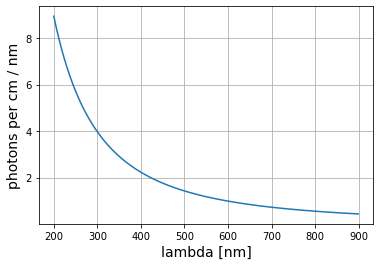

In [55]:
x = np.arange(200, 900, 1)

plt.plot(x, d2Ndxdlamb(x, bgo_n, z, beta))
plt.xlabel('lambda [nm]', size=14)
plt.ylabel('photons per cm / nm', size=14)
plt.grid()
plt.show()

In [ ]:
# Scintillation

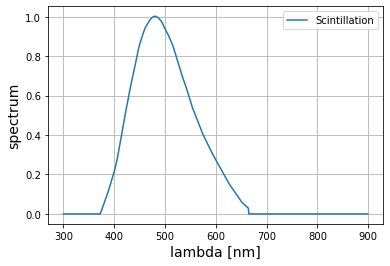

In [65]:
x = np.arange(300, 900, 1)

plt.plot(x, i_bgo_s(x), label='Scintillation')
#plt.plot(x, d2Ndxdlamb(x, bgo_n, z, beta)/4, label='Cherenkov')

#plt.plot(x, i_bgo_t(x), '--', label='Transmittance in # cm')
#plt.plot(x, i_sipm_pde(x), '--', label='S14460 pde')

plt.xlabel('lambda [nm]', size=14)
plt.ylabel('spectrum', size=14)
plt.grid()
plt.legend()
plt.show()

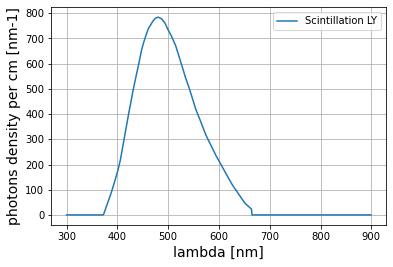

In [87]:
x = np.arange(300, 900, 1)

plt.plot(x, i_bgo_s(x)/np.sum(i_bgo_s(x))*bgo_sphotons/1, label='Scintillation LY')
#plt.plot(x, d2Ndxdlamb(x, bgo_n, z, beta), label='Cherenkov')
#plt.plot(x, i_bgo_t(x)*8, '--', label='Transmittance in x cm')

#plt.axvspan(300, 650, alpha=0.5, color='gray', label='filtered')

#plt.plot(x, i_bgo_t(x)*4, '--', label='Transmittance x cm')
#plt.plot(x, i_sipm_pde(x)/50*4, '--', label='pde S14460')

plt.xlabel('lambda [nm]', size=14)
plt.ylabel('photons density per cm [nm-1]', size=14)
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Generated photons

In [61]:
print(f'Scintillation LY in full spectrum: {bgo_sphotons:.2f} photons/cm\n')


Scintillation LY in full spectrum: 114080.00 photons/cm



In [62]:
lambd1, lambd2 = 300, 900
cher_phot = dNdx(lambd1, lambd2, bgo_n, z, beta)
print(f'Cherenkov photons in [{lambd1}-{lambd2}] nm: {cher_phot:.2f} photons/cm\n')

Cherenkov photons in [300-900] nm: 794.01 photons/cm



In [63]:
print(f'Scintillation/Cherenkov photons: {bgo_sphotons/cher_phot:.2f} photons/cm\n')

Scintillation/Cherenkov photons: 143.68 photons/cm



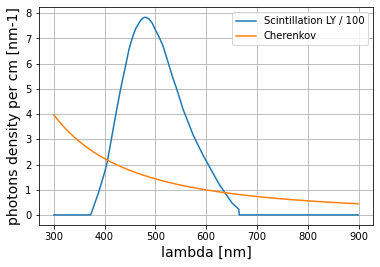

In [66]:
x = np.arange(300, 900, 1)

plt.plot(x, i_bgo_s(x)/np.sum(i_bgo_s(x))*bgo_sphotons/100, label='Scintillation LY / 100')
plt.plot(x, d2Ndxdlamb(x, bgo_n, z, beta), label='Cherenkov')
#plt.plot(x, i_bgo_t(x)*8, '--', label='Transmittance in x cm')

#plt.axvspan(300, 650, alpha=0.5, color='gray', label='filtered')

#plt.plot(x, i_bgo_t(x)*4, '--', label='Transmittance x cm')
#plt.plot(x, i_sipm_pde(x)/50*4, '--', label='pde S14460')

plt.xlabel('lambda [nm]', size=14)
plt.ylabel('photons density per cm [nm-1]', size=14)
plt.grid()
plt.legend()
plt.show()

In [91]:
# optical properties

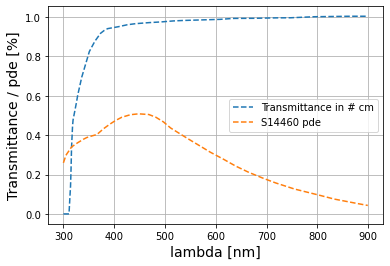

In [60]:
x = np.arange(300, 900, 1)

#plt.plot(x, i_bgo_s(x), label='Scintillation')
#plt.plot(x, d2Ndxdlamb(x, bgo_n, z, beta)/4, label='Cherenkov')

plt.plot(x, i_bgo_t(x), '--', label='Transmittance in # cm')
plt.plot(x, i_sipm_pde(x)/1, '--', label='S14460 pde')

plt.xlabel('lambda [nm]', size=14)
plt.ylabel('Transmittance / pde [%]', size=14)
plt.grid()
plt.legend()
plt.show()

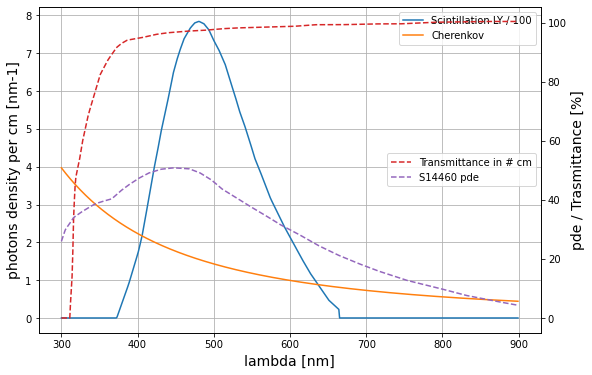

In [67]:
x = np.arange(300, 900, 1)

fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()
ax1.plot(x, i_bgo_s(x)/np.sum(i_bgo_s(x))*bgo_sphotons/100, label='Scintillation LY / 100')
ax1.plot(x, d2Ndxdlamb(x, bgo_n, z, beta), label='Cherenkov')

ax2.plot(x, i_bgo_t(x)*100, '--', label='Transmittance in # cm', color='C3')
ax2.plot(x, i_sipm_pde(x)*100, '--', label='S14460 pde', color='C4')


#plt.plot(x, i_bgo_t(x)*8, '--', label='Transmittance in x cm')

#plt.axvspan(300, 650, alpha=0.5, color='gray', label='filtered')

#plt.plot(x, i_bgo_t(x)*4, '--', label='Transmittance x cm')
#plt.plot(x, i_sipm_pde(x)/50*4, '--', label='pde S14460')

ax1.set_xlabel('lambda [nm]', size=14)
ax1.set_ylabel('photons density per cm [nm-1]', size=14)
ax2.set_ylabel('pde / Trasmittance [%]', size=14)
ax1.grid()
ax1.legend()
ax2.legend()
plt.show()

In [93]:
# times efficiency and trasmittance

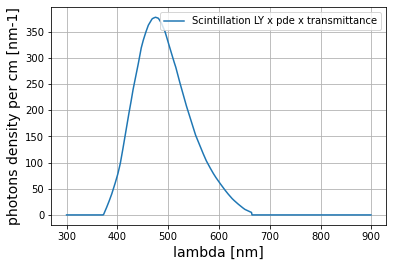

Scintillation LY x pde x trasmittance: 48732.52 photons/cm
Scintillation LY x pde x trasmittance: 3417.43 photons/MeV



In [78]:
x = np.arange(300, 900, 1)

#fig, ax1 = plt.subplots(figsize=(9, 6))
plt.plot(x, i_bgo_s_real_x_pde_x_t(x), label='Scintillation LY x pde x transmittance')
plt.xlabel('lambda [nm]', size=14)
plt.ylabel('photons density per cm [nm-1]', size=14)
plt.legend()
plt.grid()
plt.show()

npe_scint_ = np.sum(i_bgo_s_real_x_pde_x_t(x))

print(f'Scintillation LY x pde x trasmittance: {npe_scint_:.2f} photons/cm')
print(f'Scintillation LY x pde x trasmittance: {npe_scint_/bgo_dEdx:.2f} photons/MeV\n')


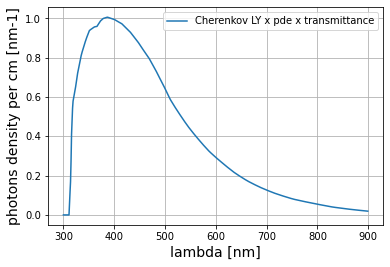

Cherenkov LY x pde x trasmittance in [300, 900] nm : 237.23 photons/cm
Cherenkov LY x pde x trasmittance in [300, 900] nm : 16.64 photons/MeV



In [94]:
x = np.arange(300, 900, 1)

#fig, ax1 = plt.subplots(figsize=(9, 6))
plt.plot(x, d2Ndxdlamb_x_pde_x_t(x, bgo_n, z, beta), label='Cherenkov LY x pde x transmittance')
plt.xlabel('lambda [nm]', size=14)
plt.ylabel('photons density per cm [nm-1]', size=14)
plt.legend()
plt.grid()
plt.show()

npe_cher_ = np.sum(d2Ndxdlamb_x_pde_x_t(x, bgo_n, z, beta))

print(f'Cherenkov LY x pde x trasmittance in [300, 900] nm : {npe_cher_:.2f} photons/cm')
print(f'Cherenkov LY x pde x trasmittance in [300, 900] nm : {npe_cher_/bgo_dEdx:.2f} photons/MeV\n')


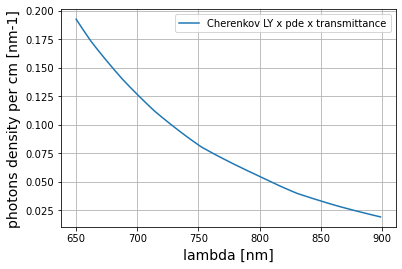

Cherenkov LY x pde x trasmittance in [650, 900] nm : 19.90 photons/cm
Cherenkov LY x pde x trasmittance in [650, 900] nm : 1.40 photons/MeV



In [100]:
x = np.arange(650, 900, 1)

#fig, ax1 = plt.subplots(figsize=(9, 6))
plt.plot(x, d2Ndxdlamb_x_pde_x_t(x, bgo_n, z, beta), label='Cherenkov LY x pde x transmittance')
plt.xlabel('lambda [nm]', size=14)
plt.ylabel('photons density per cm [nm-1]', size=14)
plt.legend()
plt.grid()
plt.show()

npe_cher_ = np.sum(d2Ndxdlamb_x_pde_x_t(x, bgo_n, z, beta))

print(f'Cherenkov LY x pde x trasmittance in [650, 900] nm : {npe_cher_:.2f} photons/cm')
print(f'Cherenkov LY x pde x trasmittance in [650, 900] nm : {npe_cher_/bgo_dEdx:.2f} photons/MeV\n')


Scintillation LY x pde x trasmittance: 48732.52 photons/cm
Scintillation LY x pde x trasmittance: 3417.43 photons/MeV



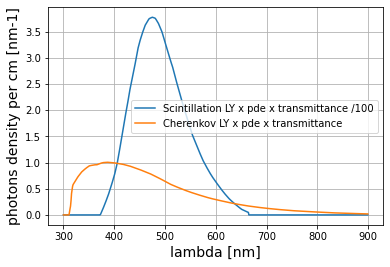

Cherenkov LY x pde x trasmittance in [300, 900] nm : 237.23 photons/cm
Cherenkov LY x pde x trasmittance in [300, 900] nm : 16.64 photons/MeV



In [98]:
x = np.arange(300, 900, 1)

#fig, ax1 = plt.subplots(figsize=(9, 6))
plt.plot(x, i_bgo_s_real_x_pde_x_t(x)/100, label='Scintillation LY x pde x transmittance /100')

npe_scint_ = np.sum(i_bgo_s_real_x_pde_x_t(x))

print(f'Scintillation LY x pde x trasmittance: {npe_scint_:.2f} photons/cm')
print(f'Scintillation LY x pde x trasmittance: {npe_scint_/bgo_dEdx:.2f} photons/MeV\n')


x = np.arange(300, 900, 1)

#fig, ax1 = plt.subplots(figsize=(9, 6))
plt.plot(x, d2Ndxdlamb_x_pde_x_t(x, bgo_n, z, beta), label='Cherenkov LY x pde x transmittance')
plt.xlabel('lambda [nm]', size=14)
plt.ylabel('photons density per cm [nm-1]', size=14)
plt.legend()
plt.grid()
plt.show()

npe_cher_ = np.sum(d2Ndxdlamb_x_pde_x_t(x, bgo_n, z, beta))

print(f'Cherenkov LY x pde x trasmittance in [300, 900] nm : {npe_cher_:.2f} photons/cm')
print(f'Cherenkov LY x pde x trasmittance in [300, 900] nm : {npe_cher_/bgo_dEdx:.2f} photons/MeV\n')


In [41]:
import numpy as np

from bokeh.plotting import figure, show
from bokeh.layouts import row
from bokeh.models import ColorBar, LogColorMapper, LinearColorMapper

# normal distribution center at x=0 and y=5
x = np.random.randn(10000)
y = np.random.randn(10000) 

nbins=10
H, xe, ye = np.histogram2d(x, y, bins=nbins)

# produce an image of the 2d histogram
p = figure(x_range=(min(xe), max(xe)), y_range=(min(ye), max(ye)), title='Image log')
color_mapper = LogColorMapper(palette="Viridis256", low=1, high=H.max())
p.image(image=[H], x=xe[0], y=ye[0], dw=xe[-1] - xe[0], dh=ye[-1] - ye[0], color_mapper=color_mapper)
color_bar = ColorBar(color_mapper=color_mapper)
p.add_layout(color_bar, "right")

p1 = figure(x_range=(min(xe), max(xe)), y_range=(min(ye), max(ye)), title='Image')
color_mapper = LinearColorMapper(palette="Viridis256", low=0, high=H.max())
p1.image(image=[H], x=xe[0], y=ye[0], dw=xe[-1] - xe[0], dh=ye[-1] - ye[0], color_mapper=color_mapper)
color_bar = ColorBar(color_mapper=color_mapper)
p1.add_layout(color_bar, "right")

# produce hexbin plot
p2 = figure(title="Hexbin", match_aspect=True)
#p.grid.visible = False
r, bins = p2.hexbin(x, y, size=0.5, hover_color="pink", hover_alpha=0.8, palette='Viridis256')

show(row(p, p1, p2))

In [40]:
import numpy as np

from bokeh.models import ColorBar, LogColorMapper
from bokeh.plotting import figure, show


def normal2d(X, Y, sigx=1.0, sigy=1.0, mux=0.0, muy=0.0):
    z = (X-mux)**2 / sigx**2 + (Y-muy)**2 / sigy**2
    return np.exp(-z/2) / (2 * np.pi * sigx * sigy)

X, Y = np.mgrid[-3:3:200j, -2:2:200j]
Z = normal2d(X, Y, 0.1, 0.2, 1.0, 1.0) + 0.1*normal2d(X, Y, 1.0, 1.0)
image = Z * 1e6

color_mapper = LogColorMapper(palette="Viridis256", low=1, high=1e7)

plot = figure(x_range=(0,1), y_range=(0,1), toolbar_location=None)
plot.image(image=[image], color_mapper=color_mapper,
           dh=1.0, dw=1.0, x=0, y=0)

color_bar = ColorBar(color_mapper=color_mapper)

plot.add_layout(color_bar, "right")

show(plot)
